In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from scipy.stats import chi2_contingency


In [3]:
filepath='https://github.com/prabhupanda/ML-code/blob/master/cars_price.csv?raw=true'
prices=pd.read_csv(filepath)

In [4]:
prices.head()

,Unnamed: 0,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,0,honda,accord,565,1993,with mileage,960015.0,petrol,2000.0,black,mechanics,front-wheel drive,D
1,1,ford,fusion,5550,2008,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M
2,2,nissan,teana,8300,2008,with mileage,223000.0,petrol,2500.0,purple,auto,front-wheel drive,D
3,3,volkswagen,fox,3300,2005,with mileage,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive,A
4,4,nissan,primera,2450,2002,with damage,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive,D


Number of Missing entries in the dataframe

In [5]:
prices.isnull().sum(axis=0)

Unnamed: 0                0
make                      0
model                     0
priceUSD                  0
year                      0
condition                 0
mileage(kilometers)       0
fuel_type                 0
volume(cm3)              30
color                     0
transmission              0
drive_unit             1345
segment                3755
dtype: int64

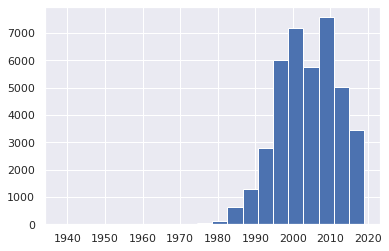

In [6]:
plt.hist(prices['year'],bins=20)
plt.show()

top 20 Number of Brands of Cars

In [7]:
prices['model'].value_counts()[0:20]

passat         1532
5-seriya       1003
a6              896
golf            783
astra           698
e-klass         694
3-seriya        591
vectra          568
laguna          549
mondeo          542
a4              495
scenic          455
zafira          427
7-seriya        417
100             406
transporter     402
megane          394
x5              387
octavia         361
c-klass         359
Name: model, dtype: int64

In [8]:
print("No. of unique drive_units {}".format(prices['drive_unit'].nunique()))
prices['drive_unit'].value_counts(dropna=False)
#with the highly skewed distribution towards the "four wheel drive" category, imputation maybe done with most ocuuring category

No. of unique drive_units 4


front-wheel drive             27074
rear drive                     4809
all-wheel drive                4176
part-time four-wheel drive     2596
NaN                            1345
Name: drive_unit, dtype: int64

In [9]:
print('No. of Segments : {}'.format(prices['segment'].nunique()))
prices['segment'].value_counts()

No. of Segments : 9


D    8985
C    7509
J    6161
M    4532
E    4391
B    3128
F     658
S     549
A     332
Name: segment, dtype: int64

*Given the high number of missing values in the "segment" and distribution of categories, Imputation will be done by predictive model.*

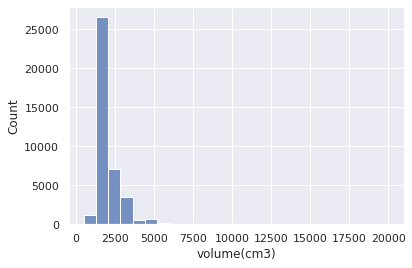

In [10]:
sns.histplot(prices['volume(cm3)'],bins=25,stat='count')

Check for corelation in the features using Pearson's Correlation

In [11]:
corr_matrix=prices.corr(method='pearson')

No strong Correlation between the numeric features


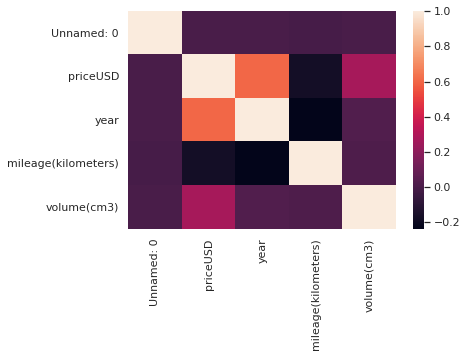

In [12]:
#plotting the coorelation matrix for visualization
sns.heatmap(corr_matrix)
print("No strong Correlation between the numeric features")

**Imputing the Missing values**

In [13]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='most_frequent',missing_values=np.NaN)
prices['drive_unit']=imputer.fit_transform(prices['drive_unit'].values.reshape(-1,1))

In [14]:
prices.isnull().sum(axis=0)

Unnamed: 0                0
make                      0
model                     0
priceUSD                  0
year                      0
condition                 0
mileage(kilometers)       0
fuel_type                 0
volume(cm3)              30
color                     0
transmission              0
drive_unit                0
segment                3755
dtype: int64

In [15]:
prices['drive_unit'].value_counts(dropna=False)

front-wheel drive             28419
rear drive                     4809
all-wheel drive                4176
part-time four-wheel drive     2596
Name: drive_unit, dtype: int64

In [16]:
vol_imputer=SimpleImputer(missing_values=np.nan, strategy='mean')
prices['volume(cm3)']=vol_imputer.fit_transform(prices['volume(cm3)'].values.reshape(-1,1))

Classifier model for imputation

In [19]:
#for imputing values in segment we will crate a classifier model using randomforestclassifier
prices['segment'].value_counts(dropna=False)

D      8985
C      7509
J      6161
M      4532
E      4391
NaN    3755
B      3128
F       658
S       549
A       332
Name: segment, dtype: int64

In [39]:
#iterating through the dataframe to collect the indices of all NaN rows
nan_rows=[]
for index,rows in prices.iterrows():
    is_nan_data=rows.isnull()
    if is_nan_data.any():
        nan_rows.append(index)


In [41]:
#getting the test set with NaN segment columns
test_set=prices.loc[nan_rows,:]
test_set.head()

,Unnamed: 0,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
20,20,volkswagen,sharan,7500,2005,with mileage,350000.0,diesel,1900.0,other,mechanics,front-wheel drive,NaN
31,31,chevrolet,epica,7000,2012,with mileage,136000.0,petrol,2000.0,black,mechanics,front-wheel drive,NaN
34,34,jaguar,xj,19500,2011,with mileage,151420.0,petrol,5000.0,brown,auto,rear drive,NaN
47,47,toyota,previa,6500,2005,with mileage,266.0,diesel,2000.0,silver,mechanics,front-wheel drive,NaN
50,50,suzuki,swift,400,1995,with mileage,195928.0,petrol,1600.0,blue,mechanics,front-wheel drive,NaN


In [48]:
#creating the training set
train_set=prices.drop(index=nan_rows)
train_set.head()

,Unnamed: 0,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,0,honda,accord,565,1993,with mileage,960015.0,petrol,2000.0,black,mechanics,front-wheel drive,D
1,1,ford,fusion,5550,2008,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M
2,2,nissan,teana,8300,2008,with mileage,223000.0,petrol,2500.0,purple,auto,front-wheel drive,D
3,3,volkswagen,fox,3300,2005,with mileage,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive,A
4,4,nissan,primera,2450,2002,with damage,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive,D


In [ ]:
train_set[train_set.make=='ford']['model'].value_counts()

In [ ]:
test_set[test_set.make=='ford']['model'].value_counts()